In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import itertools
from utils import constants as cnst
from wavelet import util, wav
from scipy.ndimage.measurements import label
from scipy import ndimage
from utils import u_arrays as ua, u_grid
import numpy.ma as ma
import pickle as pkl
from eod import mfg
from utils import u_grid, u_interpolate as u_int, u_gis
import ipdb

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [49]:
dummyfile = '/home/ck/DIR/cornkle/MCSfiles/VERAblobs/coresPower_MSG_-40_15000km2_-50points_dominant_2006_07.nc'

In [50]:
coregrid = xr.open_dataset(dummyfile)

In [51]:
coregrid = coregrid.isel(time=0)

In [52]:
outdummy = coregrid['tir'].copy()

In [53]:
outdummy.name = 'parallax'

In [54]:
outdummy = outdummy.squeeze().drop('time')

In [55]:
outdummy

<xarray.DataArray 'parallax' (lat: 386, lon: 690)>
array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ..., -2876, -3054, -3137],
       [    0,     0,     0, ..., -2522, -2875, -3056],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int16)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 20.72 20.76 20.8 20.84
  * lon      (lon) float64 -17.98 -17.93 -17.89 -17.84 ... 12.88 12.92 12.97

In [56]:
outdummy.values = outdummy.values*0

In [57]:
outdummy

<xarray.DataArray 'parallax' (lat: 386, lon: 690)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 20.72 20.76 20.8 20.84
  * lon      (lon) float64 -17.98 -17.93 -17.89 -17.84 ... 12.88 12.92 12.97

In [ ]:
t_cloud = -65
lon_sat = 0
lat_sat = 0

dataset = xr.Dataset()
lxlist = []
lylist = []
# lonlist = []
# latlist = []


for m in range(5,6):
    fillx = outdummy.copy(deep=True)
    filly = outdummy.copy(deep=True)
#     fillon = outdummy.copy(deep=True)
#     fillat = outdummy.copy(deep=True)
    for latid, lat in enumerate(coregrid.lat.values):  
        for lonid, lon in enumerate(coregrid.lon.values):
            lon_cloud = lon
            lat_cloud = lat
            km, coords = u_gis.call_parallax_era(m, t_cloud, lon_cloud, lat_cloud, lon_sat, lat_sat)

            lx, ly = km
            outlon, outlat = coords

            fillx.values[latid,lonid] = lx
            filly.values[latid,lonid] = ly
#             fillon.values[latid,lonid] = outlon
#             fillat.values[latid,lonid] = outlat
            
            #ipdb.set_trace()

    lxlist.append(fillx)
    lylist.append(filly)
#         lonlist.append(fillon)
#         latlist.append(fillat)

dataset['dx'] = xr.concat(lxlist,dim='month')
dataset['dy'] = xr.concat(lylist,dim='month')
# dataset['dlat'] = xr.concat(lonlist,dim='month')
# dataset['dlon'] = xr.concat(latlist,dim='month')

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read E

Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data
Read ERA data


In [60]:
dataset['dx'].shape

(386, 386, 690)

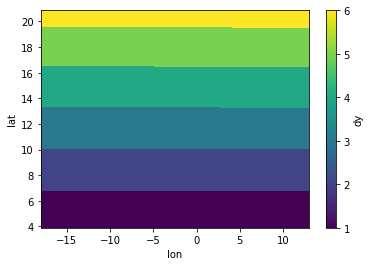

In [68]:
dataset['dy'][0,:,:].plot()

In [705]:
np.sum(power_mfg==-999)

29

In [706]:
(np.sum(power_msg<-10)-np.sum(power_mfg<-10))/np.sum(power_mfg<-10)

0.0

(array([1463.,  647.,  339.,  120.,   90.,   45.,   42.,   31.,   24.,
          18.]),
 array([ 1.61245789,  3.50895366,  5.40544943,  7.30194519,  9.19844096,
        11.09493672, 12.99143249, 14.88792826, 16.78442402, 18.68091979,
        20.57741556]),
 <a list of 10 Patch objects>)

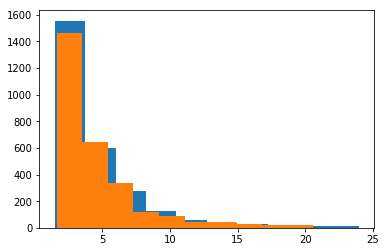

In [707]:
plt.hist(power_msg[power_msg>0.0001])
plt.hist(power_mfg[power_mfg>0.0001])

In [708]:
diff = (power_msg>0).astype(int)-(power_mfg>0).astype(int)

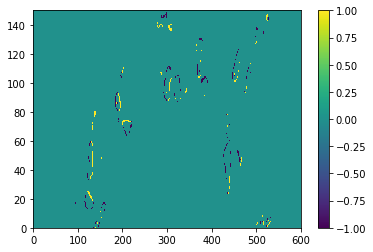

In [709]:
plt.pcolormesh(diff)
plt.colorbar()

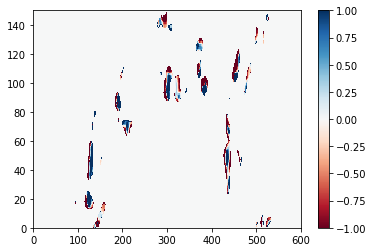

In [710]:
diff = (power_msg)-(power_mfg)
plt.pcolormesh(diff, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar()

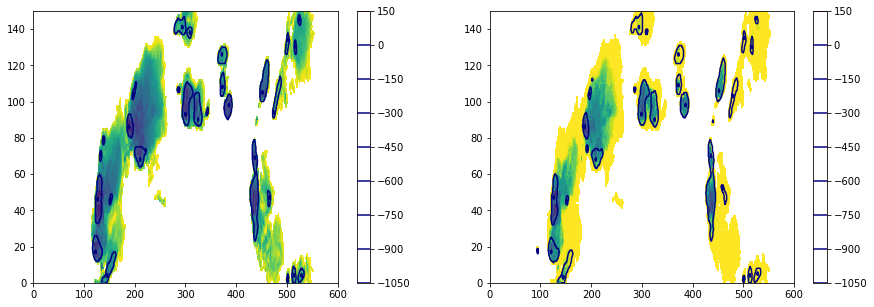

In [711]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-3,3,9) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
plt.pcolormesh(msg_img)
plt.contour(power_msg, cmap='jet', vmin=0)
plt.colorbar()
ax = f.add_subplot(122)

plt.pcolormesh(mfg_img, vmax=-65)
plt.contour(power_mfg, cmap='jet', vmin=0)
plt.colorbar()

(array([ 78., 442., 586., 499., 344., 355., 322.,  96.,   6.,   1.]),
 array([-86.99 , -83.401, -79.812, -76.223, -72.634, -69.045, -65.456,
        -61.867, -58.278, -54.689, -51.1  ]),
 <a list of 10 Patch objects>)

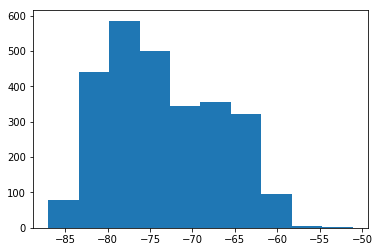

In [712]:
plt.hist(msg_img[power_msg>0])

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(array([  40.,  196.,  662.,  884., 1351., 1418., 1250., 1405., 1895.,
        1739.]),
 array([-86.99 , -84.292, -81.594, -78.896, -76.198, -73.5  , -70.802,
        -68.104, -65.406, -62.708, -60.01 ]),
 <a list of 10 Patch objects>)

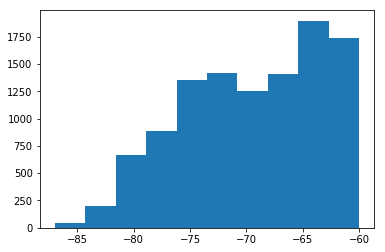

In [713]:
plt.hist(msg_img[msg_img<-60])

In [714]:
bloblist = []
tirlist = []
lat = ar_msg.lat
lon = ar_msg.lon

tir = ar_msg['tir']
tir = tir[(tir['time.hour']>=15)&(tir['time.hour']<=20)]
for day in tir[100:600]:
    date = day.time
    day.values = day/100
    img, nogood = filter_img(day.values)
    power = util.waveletT(img, dataset='METEOSAT5K_vera')
    power_msg = find_scales_dominant(power, img, no_good=nogood, core_min=-50, dataset='msg')
    
    bloblist.append(xr.DataArray(power_msg.astype(np.int16), coords={'time': date, 'lat': lat, 'lon':lon}, dims=['lat', 'lon'])) #[np.newaxis, :])
    tirlist.append(xr.DataArray(day.values, coords={'time': date, 'lat': lat, 'lon':lon}, dims=['lat', 'lon']))

ds = xr.Dataset()
ds['blobs'] = xr.concat(bloblist, 'time')
ds['tir'] = xr.concat(tirlist, 'time')

outmin -87.62 40.7
outmin -85.05 38.0
outmin -87.04 36.53
outmin -88.16 33.97
outmin -87.63 32.0
outmin -87.12 31.0
outmin -87.34 30.0
outmin -83.99 29.0
outmin -86.98 46.55
outmin -77.85 45.6
outmin -81.34 44.0
outmin -85.15 41.46
outmin -82.55 39.0
outmin -81.81 37.0
outmin -82.14 35.0
outmin -84.0 33.0
outmin -87.41 32.0
outmin -81.02 31.0
outmin -87.6 31.0
outmin -80.95 31.0
outmin -82.0 50.69
outmin -82.72 48.0
outmin -83.06 45.0
outmin -84.81 43.0
outmin -87.0 41.0
outmin -86.13 38.28
outmin -86.26 36.0
outmin -93.75 34.89
outmin -84.6 33.0
outmin -87.21 32.0
outmin -88.28 31.87
outmin -84.0 31.0
outmin -84.45 49.79
outmin -88.49 48.0
outmin -88.35 46.0
outmin -89.02 44.0
outmin -88.91 41.93
outmin -90.3 39.0
outmin -85.39 37.0
outmin -84.06 35.0
outmin -88.65 33.0
outmin -88.55 31.0
outmin -85.45 30.82
outmin -86.23 29.76
outmin -83.87 46.0
outmin -86.71 44.95
outmin -88.53 43.53
outmin -84.54 41.0
outmin -85.87 39.0
outmin -88.38 36.0
outmin -82.81 34.0
outmin -86.79 32.0
outmi

In [715]:
bloblist = []
tirlist = []
lat = ar_mfg.lat
lon = ar_mfg.lon

tir = ar_mfg['tir']
tir = tir[(tir['time.hour']>=15)&(tir['time.hour']<=20)]
for day in tir[100:600]:
    date = day.time
    day.values = day/100
    if np.sum(day.values) == 0:
        continue
    img, nogood = filter_img(day.values)
    power = util.waveletT(img, dataset='METEOSAT5K_vera')
   
    power_mfg = find_scales_dominant(power, img, no_good=nogood, core_min=-50, dataset='mfg')
    
    bloblist.append(xr.DataArray(power_mfg.astype(np.int16), coords={'time': date, 'lat': lat, 'lon':lon}, dims=['lat', 'lon'])) #[np.newaxis, :])
    tirlist.append(xr.DataArray(day.values, coords={'time': date, 'lat': lat, 'lon':lon}, dims=['lat', 'lon']))

ds_mfg = xr.Dataset()
ds_mfg['blobs'] = xr.concat(bloblist, 'time')
ds_mfg['tir'] = xr.concat(tirlist, 'time')

outmin -80.08 28.48
11.631882464306216
outmin -82.23 28.0
11.631882464306216
outmin -75.93 45.59
11.631882464306216
outmin -76.31 45.0
11.631882464306216
outmin -76.02 42.0
11.631882464306216
outmin -77.0 40.0
11.631882464306216
outmin -74.87 38.0
11.631882464306216
outmin -75.9 36.0
11.631882464306216
outmin -80.45 34.0
11.631882464306216
outmin -78.69 32.0
11.631882464306216
outmin -79.77 31.0
11.631882464306216
outmin -79.56 30.0
11.631882464306216
outmin -80.5 30.0
11.631882464306216
outmin -77.9 30.0
11.631882464306216
outmin -78.86 47.95
11.631882464306216
outmin -79.0 45.22
11.631882464306216
outmin -80.0 43.0
11.631882464306216
outmin -79.57 41.0
11.631882464306216
outmin -78.19 39.0
11.631882464306216
outmin -84.58 36.59
11.631882464306216
outmin -83.0 35.0
11.631882464306216
outmin -82.13 33.0
11.631882464306216
outmin -80.12 32.0
11.631882464306216
outmin -81.0 31.0
11.631882464306216
outmin -80.46 30.0
11.631882464306216
outmin -79.0 29.97
11.631882464306216
outmin -82.85 4

outmin -78.5 35.68
11.631882464306216
outmin -78.56 33.75
11.631882464306216
outmin -80.54 31.97
11.631882464306216
outmin -79.67 30.0
11.631882464306216
outmin -83.0 29.99
11.631882464306216
outmin -80.64 29.0
11.631882464306216
outmin -80.74 29.0
11.631882464306216
outmin -81.73 43.73
11.631882464306216
outmin -81.0 43.0
11.631882464306216
outmin -84.84 41.82
11.631882464306216
outmin -82.87 39.82
11.631882464306216
outmin -81.57 38.0
11.631882464306216
outmin -83.0 36.0
11.631882464306216
outmin -83.13 34.0
11.631882464306216
outmin -82.95 32.0
11.631882464306216
outmin -83.0 31.0
11.631882464306216
outmin -84.96 30.0
11.631882464306216
outmin -86.0 30.0
11.631882464306216
outmin -83.0 29.7
11.631882464306216
outmin -78.9 42.0
11.631882464306216
outmin -80.39 41.0
11.631882464306216
outmin -78.74 39.0
11.631882464306216
outmin -77.81 37.0
11.631882464306216
outmin -80.89 35.99
11.631882464306216
outmin -79.47 33.86
11.631882464306216
outmin -82.36 32.0
11.631882464306216
outmin -79.

In [71]:
ds

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674, time: 260)
Coordinates:
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * time     (time) datetime64[ns] 2004-09-09T17:00:00 ... 2004-09-30T20:30:00
Data variables:
    blobs    (time, lat, lon) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    tir      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 23.0 23.0 23.0 23.0

In [72]:
ds_mfg

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674, time: 260)
Coordinates:
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * time     (time) datetime64[ns] 2004-09-09T17:00:00 ... 2004-09-30T20:30:00
Data variables:
    blobs    (time, lat, lon) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    tir      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 22.0 22.0 22.01 22.0

In [73]:
inter = np.intersect1d(ds.time,ds_mfg.time, return_indices=True)

In [74]:
ds_msg = ds.isel(time=inter[1])
ds_msg

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674, time: 260)
Coordinates:
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * time     (time) datetime64[ns] 2004-09-09T17:00:00 ... 2004-09-30T20:30:00
Data variables:
    blobs    (time, lat, lon) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    tir      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 23.0 23.0 23.0 23.0

In [75]:
msg_blobs = ds_msg['blobs'].sel(lat=slice(5,10), lon=slice(-12,10))
mfg_blobs = ds_mfg['blobs'].sel(lat=slice(5,10), lon=slice(-12,10))
msg_tir = ds_msg['tir'].sel(lat=slice(5,10), lon=slice(-12,10))
mfg_tir = ds_mfg['tir'].sel(lat=slice(5,10), lon=slice(-12,10))

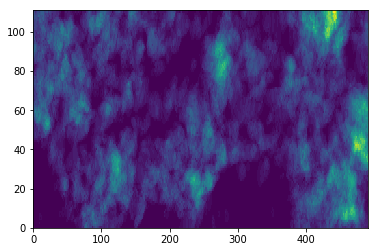

In [76]:
plt.pcolormesh(np.sum(msg_blobs>0, axis=0).astype(int))

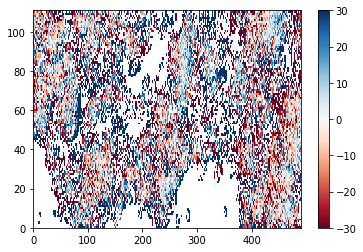

In [105]:
plt.pcolormesh(((np.sum(msg_blobs>0, axis=0).astype(int)-np.sum(mfg_blobs>0, axis=0).astype(int))/np.sum(msg_blobs>0, axis=0).astype(int))*100, cmap='RdBu', vmin=-30,vmax=30)
plt.colorbar()

In [84]:
np.sum((np.sum(msg_blobs>0).astype(int)-np.sum(mfg_blobs>0).astype(int)))/np.sum(mfg_blobs>0).astype(int)

<xarray.DataArray 'blobs' ()>
array(-0.004642)

(array([1.9846e+05, 5.7033e+04, 1.9821e+04, 7.0310e+03, 2.6050e+03,
        7.8200e+02, 2.5400e+02, 7.4000e+01, 2.0000e+01, 6.0000e+00]),
 array([ 12. ,  36.5,  61. ,  85.5, 110. , 134.5, 159. , 183.5, 208. ,
        232.5, 257. ]),
 <a list of 10 Patch objects>)

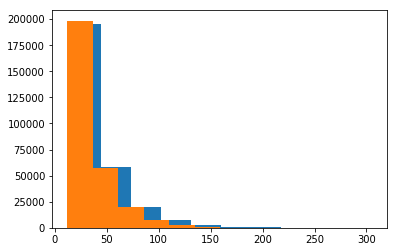

In [85]:
plt.hist(msg_blobs.values.flat[msg_blobs.values.flat>0])
plt.hist(mfg_blobs.values.flat[mfg_blobs.values.flat>0])

In [80]:
print('Single point')
np.sum((np.sum(msg_blobs==-999).astype(int)-np.sum(mfg_blobs==-999).astype(int)))/np.sum(mfg_blobs==-999).astype(int)

Single point


<xarray.DataArray 'blobs' ()>
array(0.062464)

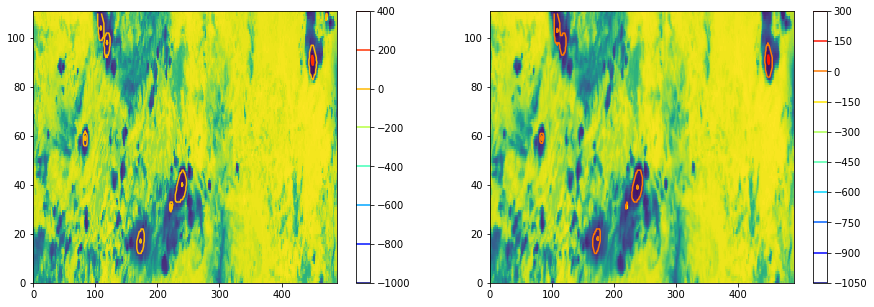

In [81]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-3,3,9) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

index = 33

f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
plt.pcolormesh(msg_tir[index,:,:])
plt.contour(msg_blobs[index,:,:], cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(mfg_tir[index,:,:])
plt.contour(mfg_blobs[index,:,:], cmap='jet')
plt.colorbar()

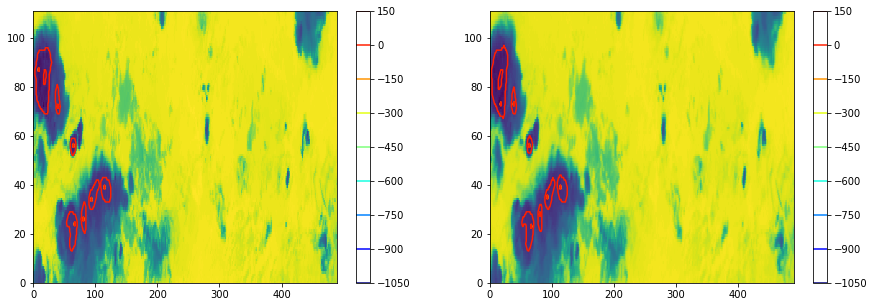

In [99]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-3,3,9) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

index = 220

f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
plt.pcolormesh(msg_tir[index,:,:])
plt.contour(msg_blobs[index,:,:], cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(mfg_tir[index,:,:])
plt.contour(mfg_blobs[index,:,:],cmap='jet')

plt.colorbar()

In [87]:
mfg_blobs.shape

(260, 111, 490)

In [88]:
mfg_b = np.sum(mfg_blobs<0, axis=(1,2))
msg_b = np.sum(msg_blobs<0, axis=(1,2))

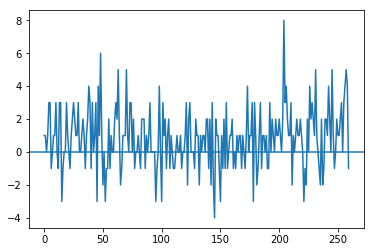

In [92]:
plt.plot(msg_b-mfg_b)
plt.axhline(0,0,250)

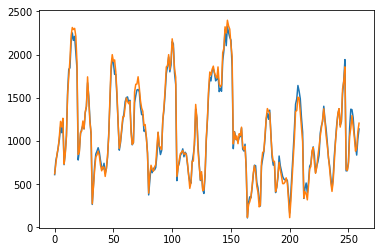

In [93]:
mfg_b = np.sum(mfg_blobs>0, axis=(1,2))
msg_b = np.sum(msg_blobs>0, axis=(1,2))
plt.plot(msg_b)
plt.plot(mfg_b)

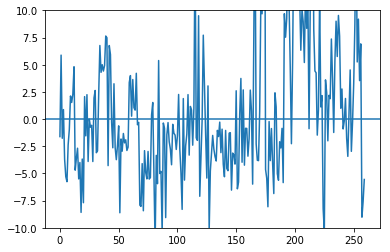

In [104]:
mfg_b = np.sum(mfg_blobs>0, axis=(1,2))
msg_b = np.sum(msg_blobs>0, axis=(1,2))
plt.plot((msg_b-mfg_b)/(mfg_b)*100)
plt.ylim(-10,10)
plt.axhline(0,0,250)

In [ ]:
print('area', (np.sum((msg_blobs>0).astype(int))-np.sum((mfg_blobs>0).astype(int)))/np.sum((mfg_blobs>0).astype(int)))
print('points', (np.sum((msg_blobs<0).astype(int))-np.sum((mfg_blobs<0).astype(int)))/np.sum((mfg_blobs<0).astype(int)))